## 데이터셋 분석 및 불균형 처리

### 불균형 분석 접근 방법
### 1. 유전자 발현 값 분포 확인:
각 유전자의 발현 값이 특정 범위에 집중되어 있는지 확인합니다. 예를 들어, train.csv의 유전자 발현 값의 평균, 분산, 최대/최소값을 분석합니다.
발현 값이 0에 가깝거나 특정 값에 집중된 유전자가 있다면 그에 따라 손실 함수나 가중치를 조정할 필요가 있을 수 있습니다.

### 2. 상관 관계 분석:
유전자 발현 값 간의 상관 관계를 분석하여, 상관이 높은 유전자 그룹을 찾고, 이들을 그룹화하여 모델에 도움을 줄 수도 있습니다.

### 3. 유전자별 분산이 낮은 경우 처리:
분산이 낮은 유전자(즉, 거의 일정한 값으로 유지되는 유전자)는 모델이 예측하기 어렵거나 의미가 적을 수 있습니다. 이런 유전자는 별도로 분석하거나 제거를 고려할 수 있습니다.

### 1. 유전자 발현 값 분포 확인 

In [10]:
import pandas as pd

# 1. train 데이터 로드
train_path = '/Users/nayeong-eun/desktop/open/train.csv'  # 경로는 실제 파일 경로로 수정
train_df = pd.read_csv(train_path)

# 2. 유전자 발현 정보 열 추출 (ID와 path 열 제외)
gene_columns = train_df.columns[2:]  # 첫 두 열(ID와 path) 제외한 유전자 발현 열만 선택
gene_data = train_df[gene_columns]

# 3. 유전자별 통계 계산 (평균, 분산, 최소값, 최대값)
gene_stats = gene_data.describe().loc[['mean', 'std', 'min', 'max']].T

# 4. 유전자 발현 정보 통계 요약 출력
print("유전자 발현 값 통계 요약 (평균, 표준편차, 최소값, 최대값):")
print(gene_stats)


유전자 발현 값 통계 요약 (평균, 표준편차, 최소값, 최대값):
                mean       std       min       max
AL645608.7  0.001924  0.042904 -0.000855  1.665408
HES4        0.039266  0.162791  0.000104  2.421902
TNFRSF18    0.001032  0.036913 -0.000413  2.223589
TNFRSF4     0.006537  0.065410 -0.000846  2.025075
SDF4        0.630656  0.500612 -0.027202  4.178433
...              ...       ...       ...       ...
MT-ND4      3.295134  0.610507 -0.151230  5.472216
MT-ND5      1.352524  0.719349 -0.184246  5.473069
MT-CYB      3.039615  0.614839 -0.112873  4.827171
BX004987.1  0.001528  0.034110 -0.000464  1.595043
AL592183.1  0.002554  0.030666 -0.000459  0.998111

[3467 rows x 4 columns]


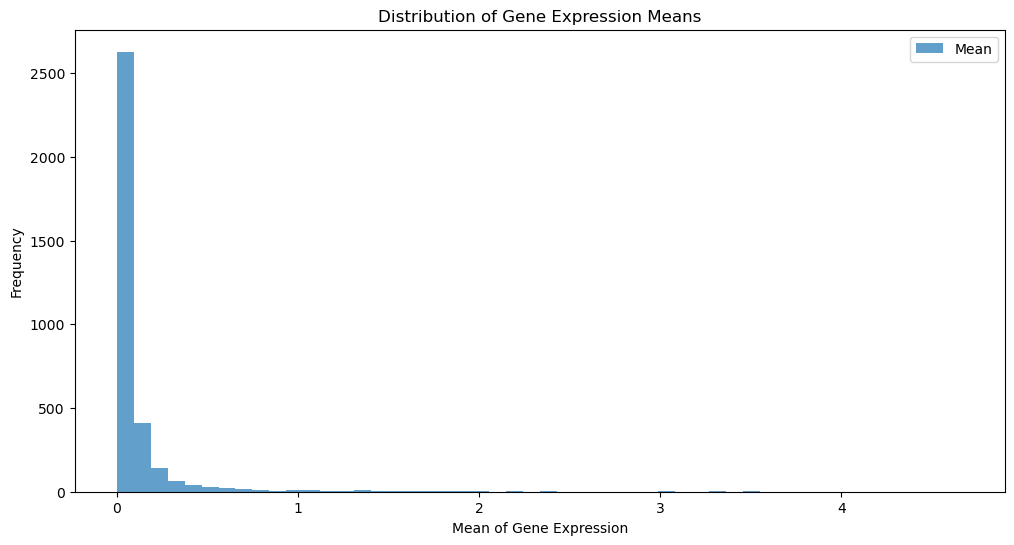

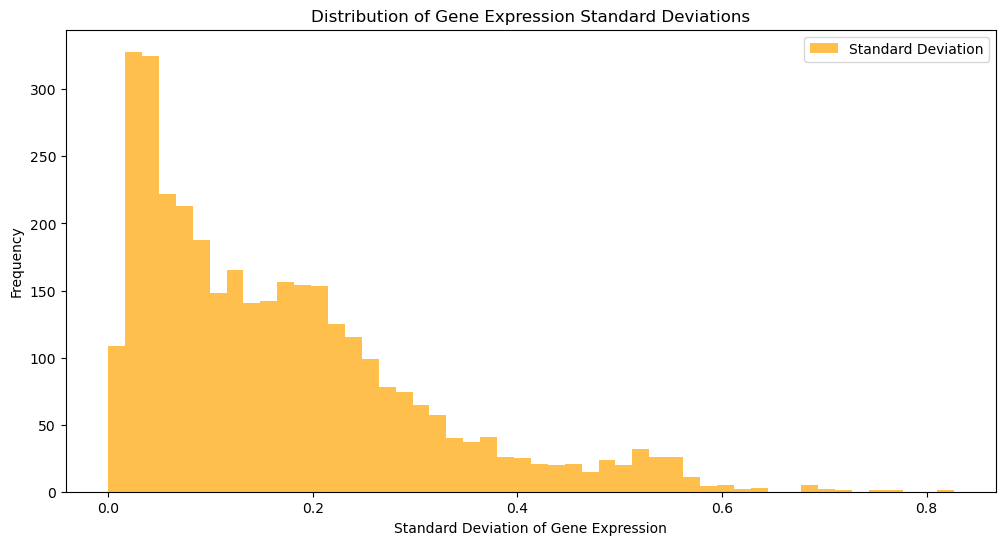

In [11]:
# 3. 유전자별 평균, 표준편차 계산
import matplotlib.pyplot as plt
gene_means = gene_data.mean()
gene_stds = gene_data.std()

# 4. 유전자 발현 값 분포 시각화 - 평균 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(gene_means, bins=50, alpha=0.7, label='Mean')
plt.xlabel('Mean of Gene Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Means')
plt.legend()
plt.show()

# 5. 유전자 발현 값 분포 시각화 - 표준편차 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(gene_stds, bins=50, alpha=0.7, color='orange', label='Standard Deviation')
plt.xlabel('Standard Deviation of Gene Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Standard Deviations')
plt.legend()
plt.show()

(질문) 트레인 데이터 값에서 음수 : 음수 값이 포함된 유전자 발현 값이 있는 이유는, 유전자 발현 값을 표준화하거나 정규화하는 과정에서 발생?// 음수 값은 평균보다 낮은 발현 값을 의미할?  

(질문)평균 0이고 표준편차 0인 유전자 - 발현이 안되는 거 
그럼 그냥 전처리 과정에서 뺴는 건 ?? 

1. 유전자 발현 값 평균 분포 (첫 번째 그래프)
- 대부분의 유전자 발현 값의 평균이 0에 가까운 값에 집중되어 있습니다.
- 소수의 유전자만이 평균 발현 값이 1 이상인 값을 가지고 있습니다.
- 이 분포는 대부분의 유전자가 거의 발현되지 않거나 매우 낮은 발현 값을 가진다는 것을 의미할 수 있습니다.
- 예를 들어, 특정 유전자의 평균 발현 값이 거의 0에 가깝다면, 해당 유전자는 데이터셋 내에서 발현되지 않는 경향이 크다고 볼 수 있습니다.
2. 유전자 발현 값 표준편차 분포 (두 번째 그래프)
- 대부분의 유전자 발현 값의 **표준편차가 낮은 값(0에 가까운 값)**에 집중되어 있습니다.
- 일부 유전자는 표준편차가 큰 값을 가지지만, 대부분은 발현 값의 변화가 크지 않음을 의미합니다.
- 표준편차가 매우 낮은 유전자들은 발현 값이 거의 일정하게 유지되는 경향을 보입니다.
- 이는 해당 유전자들이 모든 샘플에서 비슷한 발현 값을 가지며, 데이터셋 내에서 발현 패턴이 제한적일 수 있음을 시사합니다.

* 해석과 불균형 문제
- 불균형 문제: 대부분의 유전자가 평균 발현 값이 낮고 표준편차도 낮은 상태입니다. 이는 데이터셋이 과도하게 0에 가깝거나 낮은 발현 값에 집중되어 있는 불균형을 가지고 있다는 것을 의미합니다.
- 모델에 미치는 영향: 이러한 데이터 불균형은 모델이 학습 과정에서 발현이 낮은 유전자에 대해 예측 성능이 좋지만, 발현이 높은 유전자나 변동성이 큰 유전자에 대해서는 예측 성능이 낮을 수 있습니다.
- 해결 방법:
1) 가중치 조정: 손실 함수에 가중치를 부여하여 발현 값이 높은 유전자가 모델 학습에 더 큰 영향을 미치도록 할 수 있습니다.
2) 데이터 증강: 데이터 증강을 통해 다양한 발현 값을 갖는 샘플을 늘리는 것도 한 방법입니다.

### 2. 상관관계 분석 

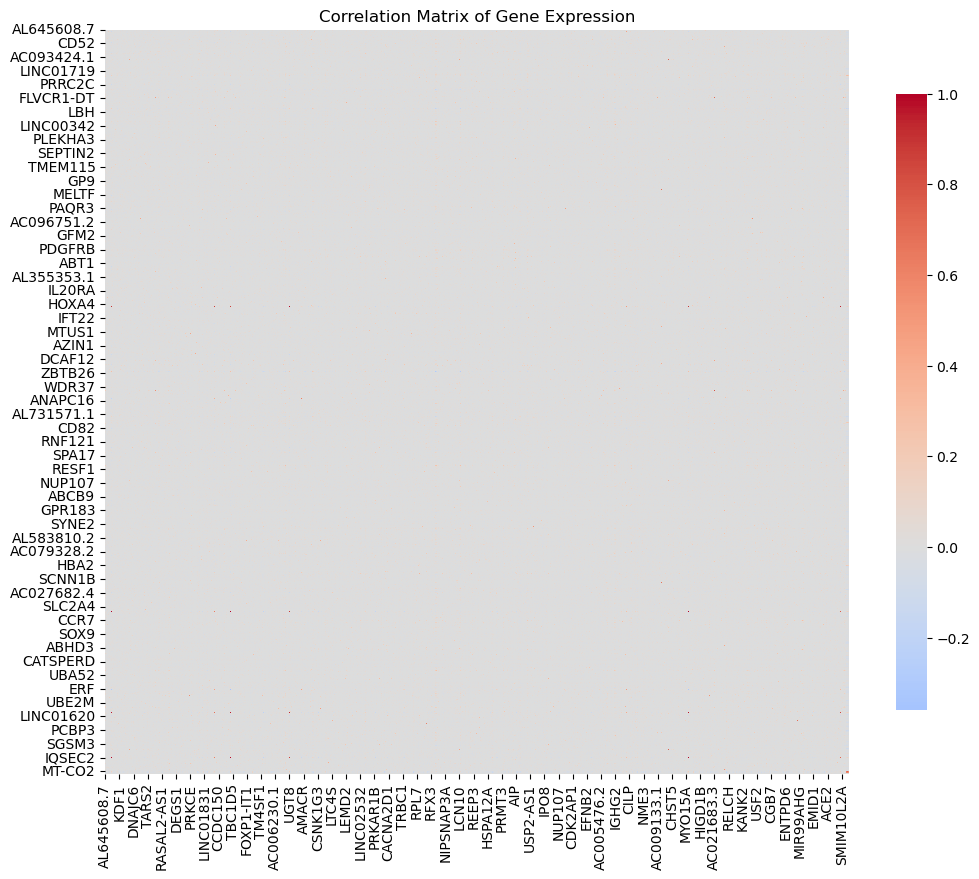

상관 계수가 0.8 이상인 유전자 페어:
             Gene1       Gene2  Correlation
100916     ANGPTL7  AC012074.1     0.999627
101126     ANGPTL7        OXTR     0.997991
101401     ANGPTL7        UGT8     0.883277
101428     ANGPTL7      RNF175     0.999089
101833     ANGPTL7       PDE1C     0.893330
...            ...         ...          ...
11879232  DCAF12L1       PDE1C     0.948075
11879318  DCAF12L1  AC078845.1     0.803578
11881124  DCAF12L1  AL031668.2     0.828285
11992348   MT-ATP6      MT-ND4     0.808448
12006212    MT-ND4     MT-ATP6     0.808448

[264 rows x 3 columns]


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. 상관 행렬 계산
correlation_matrix = gene_data.corr()

# 4. 상관 행렬 시각화 (히트맵)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Gene Expression")
plt.show()

# 5. 상관 관계가 높은 유전자 페어 추출 (예: 상관 계수가 0.8 이상)
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Gene1', 'Gene2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Gene1'] != high_corr_pairs['Gene2']) & (high_corr_pairs['Correlation'] > 0.8)]
print("상관 계수가 0.8 이상인 유전자 페어:")
print(high_corr_pairs)


In [13]:
! pip install networkx

import networkx as nx


In [14]:
# 6. 상관 관계가 높은 유전자 페어로 그래프 생성
G = nx.Graph()
G.add_edges_from(zip(high_corr_pairs['Gene1'], high_corr_pairs['Gene2']))

# 7. 상관 관계가 높은 유전자 그룹 추출 및 대표 유전자 선택
groups = list(nx.connected_components(G))
filtered_genes = []

for group in groups:
    representative_gene = next(iter(group))  # 그룹의 첫 번째 유전자를 대표로 선택
    filtered_genes.append(representative_gene)

# 8. 상관 관계가 높은 그룹에 포함되지 않은 유전자들도 추가 (상관 관계가 낮은 유전자들)
remaining_genes = set(gene_columns) - set(G.nodes)
filtered_genes.extend(remaining_genes)

# 9. 최종 선택된 유전자 리스트 출력
print(f"최종 선택된 유전자 개수: {len(filtered_genes)}")
print(filtered_genes)

최종 선택된 유전자 개수: 3421
['AC078845.1', 'SOX2', 'ARTN', 'LINC01781', 'KCNN3', 'CRB1', 'SPATA17', 'PHGR1', 'AC090527.3', 'AC120114.2', 'ADAD1', 'UNC5D', 'EBF3', 'HOXA10', 'ADAMTS8', 'AL449403.2', 'FAM225B', 'TNFSF15', 'AC021683.2', 'PDX1', 'MYCBP2-AS1', 'EDNRB-AS1', 'LINC01002', 'AC021683.5', 'MT-ND4', 'LGI2', 'PCBP1', 'GAL3ST4', 'CASKIN2', 'CCDC3', 'BAIAP2L2', 'RHOT2', 'MED16', 'PRDX6', 'AC025048.4', 'KLK10', 'ATP5F1E', 'PRKCE', 'CHMP1B-AS1', 'VTI1B', 'MTF2', 'PPA1', 'SPINT2', 'CD3E', 'CCDC73', 'APLP2', 'ZNF514', 'DYNC1H1', 'MSI1', 'NOX5', 'AL445250.1', 'C8orf88', 'TRAPPC3L', 'C3orf70', 'ADAM19', 'ASPN', 'TRMT61B', 'PCAT1', 'SEH1L', 'TACSTD2', 'ITPR3', 'AR', 'AC093599.2', 'FAM53A', 'DIAPH1', 'HSPA12A', 'HLA-DMA', 'OSMR', 'TAX1BP1', 'PUS7L', 'DALRD3', 'FAM229B', 'TNKS2', 'SPG7', 'WFDC2', 'SP1', 'RANGRF', 'TMEM8B', 'CYP20A1', 'CCDC171', 'ADAM33', 'FAM8A1', 'AL133453.1', 'DOCK2', 'GDPD5', 'PTGDS', 'HIST2H2AB', 'AL445183.2', 'AC023632.2', 'TNFRSF19', 'TMEM51', 'TNNT3', 'CCL15', 'MRPL2', 'TOB1-A

원래 유전자 총 3467개 존재 -> 3421... 

### 3. 유전자별 분산이 낮은 경우 처리:

In [15]:
# 분산 임계값 설정 (예: 0.01)
variance_threshold = 0.01

# 유전자별 분산 계산
gene_variances = gene_data.var()

# 분산이 임계값 이상인 유전자 선택
genes_with_high_variance = gene_columns[gene_variances > variance_threshold]

# 필터링된 유전자 데이터
filtered_gene_data_by_variance = gene_data[genes_with_high_variance]

# 결과 확인
print(f"원래 유전자 개수: {len(gene_columns)}")
print(f"분산이 낮아 제거된 유전자 개수: {len(gene_columns) - len(genes_with_high_variance)}")
print(f"제거 후 유전자 개수: {len(genes_with_high_variance)}")


원래 유전자 개수: 3467
분산이 낮아 제거된 유전자 개수: 1390
제거 후 유전자 개수: 2077
